# Machine Learning Part 1

### 1. Import Libraries and Datasets
### 2. Data Wrangling
### 3. Data Preparation
### 4. Regression Analysis
### 5. Performance Improvement After Removing Outliers

### Hypothesis:

The average cost of houses in the US has increased at a greater rate than the average household income from 2008-2022.

## Import Libraries and Datasets

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

Import Dataset

In [3]:
path = r'C:\Users\kacee\OneDrive\Desktop\Project6'

In [4]:
# Importing Merged data
df= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Geospatial_Complete_Data.csv'), index_col = False)

## Data Wrangling

In [5]:
df.columns

Index(['Unnamed: 0', 'Year', 'State', 'House Cost', 'Income',
       'State_Minimum_Wage', 'House Category', 'Income Category',
       'Multiplied_Income', 'Multiplied_Wage', 'Income_Percentage',
       'Minimum_Wage_Yearly'],
      dtype='object')

In [6]:
df.head(20)

,Unnamed: 0,Year,State,House Cost,Income,State_Minimum_Wage,House Category,Income Category,Multiplied_Income,Multiplied_Wage,Income_Percentage,Minimum_Wage_Yearly
0,0,2008,AL,137250.036361,44480.0,5.85,Low Median Price,Low Income,3.085657,11.279589,32.408006,12168.0
1,1,2008,AR,114877.181812,39590.0,6.25,Low Median Price,Low Income,2.901672,8.836706,34.462893,13000.0
2,2,2008,AZ,201922.818171,46910.0,6.90,Middle Median Price,Low Income,4.304473,14.069316,23.231649,14352.0
3,3,2008,CA,336043.181811,57010.0,8.00,High Median Price,Middle Income,5.894460,20.194903,16.965082,16640.0
4,4,2008,CO,230399.352287,60940.0,7.02,Middle Median Price,Middle Income,3.780757,15.779048,26.449727,14601.6
5,5,2008,CT,269690.000000,64680.0,7.65,Middle Median Price,Middle Income,4.169604,16.948844,23.983092,15912.0
6,6,2008,DE,210382.954550,50700.0,7.15,Middle Median Price,Low Income,4.149565,14.146245,24.098911,14872.0
7,7,2008,FL,191100.059283,44860.0,6.79,Middle Median Price,Low Income,4.259921,13.530932,23.474613,14123.2
8,8,2008,GA,135955.603904,46230.0,5.15,Low Median Price,Low Income,2.940852,12.691897,34.003747,10712.0
9,9,2008,HI,395057.272733,61520.0,7.25,High Median Price,Middle Income,6.421607,26.197432,15.572426,15080.0


In [7]:
df = df.drop(columns =['Unnamed: 0'])

In [8]:
df.shape

(720, 11)

In [9]:
# Due to how columns were formed in geospatial analysis, many columns should have null value
df.isnull().sum()

Year                   0
State                  0
House Cost             0
Income                 0
State_Minimum_Wage     0
House Category         0
Income Category        0
Multiplied_Income      0
Multiplied_Wage        0
Income_Percentage      0
Minimum_Wage_Yearly    0
dtype: int64

In [10]:
dups = df.duplicated()

In [11]:
dups.shape

(720,)

C:\Users\kacee\AppData\Local\Temp\ipykernel_41936\1188715448.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'], bins=25)


<Axes: xlabel='Income', ylabel='Density'>

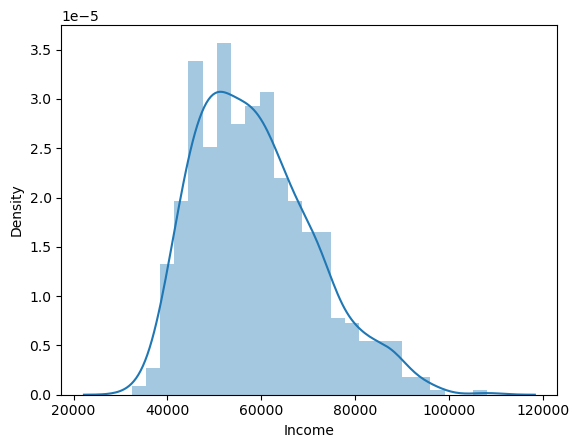

In [12]:
# Shows extreme values
sns.distplot(df['Income'], bins=25) 

C:\Users\kacee\AppData\Local\Temp\ipykernel_41936\3521113845.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['House Cost'], bins=25)


<Axes: xlabel='House Cost', ylabel='Density'>

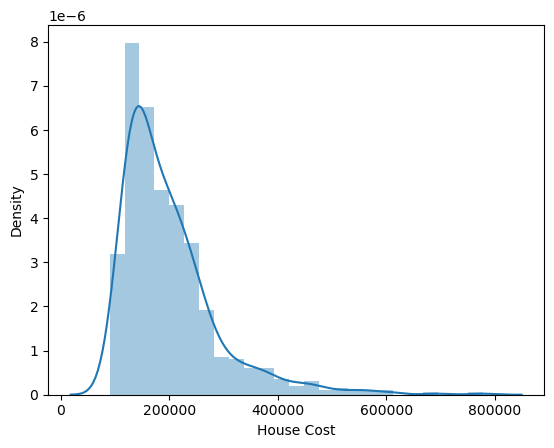

In [13]:
# Shows extreme values
sns.distplot(df['House Cost'], bins=25) 

In [14]:
df['Income'].mean()

58764.958333333336

In [15]:
df['House Cost'].mean()

199041.1277075486

In [16]:
df['Income'].median()

56970.0

In [17]:
df['House Cost'].median()

176275.31247499998

In [18]:
df['Income'].max()

108200.0

In [19]:
df['House Cost'].max()

777521.270825

## Data Preparation

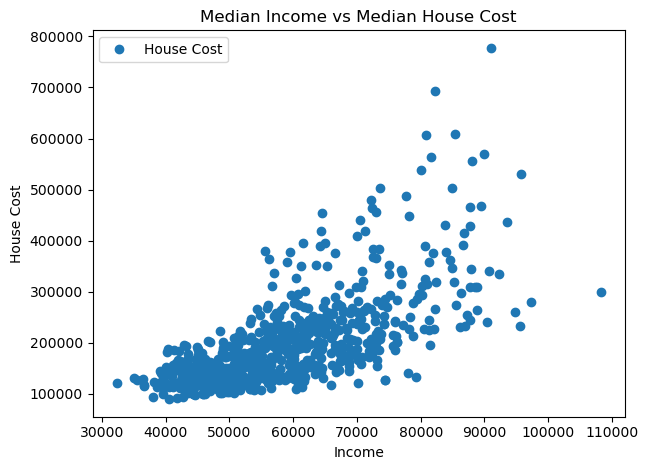

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x = 'Income', y='House Cost',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Median Income vs Median House Cost')  
plt.tight_layout()  
plt.xlabel('Income')  
plt.ylabel('House Cost')  
plt.show()

In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['Income'].values.reshape(-1,1)
y = df['House Cost'].values.reshape(-1,1)

In [22]:
X

array([[ 44480.],
       [ 39590.],
       [ 46910.],
       [ 57010.],
       [ 60940.],
       [ 64680.],
       [ 50700.],
       [ 44860.],
       [ 46230.],
       [ 61520.],
       [ 50140.],
       [ 47420.],
       [ 53250.],
       [ 46520.],
       [ 47880.],
       [ 41150.],
       [ 39560.],
       [ 60320.],
       [ 63710.],
       [ 47230.],
       [ 49790.],
       [ 54930.],
       [ 46040.],
       [ 36450.],
       [ 42900.],
       [ 42930.],
       [ 49630.],
       [ 50730.],
       [ 66180.],
       [ 65310.],
       [ 42100.],
       [ 54740.],
       [ 50460.],
       [ 46930.],
       [ 46110.],
       [ 51730.],
       [ 51400.],
       [ 53240.],
       [ 42160.],
       [ 51600.],
       [ 39700.],
       [ 46490.],
       [ 62540.],
       [ 61990.],
       [ 56630.],
       [ 51200.],
       [ 37990.],
       [ 53340.],
       [ 39980.],
       [ 36540.],
       [ 45740.],
       [ 56130.],
       [ 55930.],
       [ 64850.],
       [ 52110.],
       [ 4

In [23]:
y

array([[137250.036361  ],
       [114877.18181167],
       [201922.81817143],
       [336043.18181111],
       [230399.3522875 ],
       [269690.        ],
       [210382.95455   ],
       [191100.05928261],
       [135955.60390357],
       [395057.27273333],
       [133111.36365   ],
       [155434.90906667],
       [109965.42207929],
       [105640.19835   ],
       [116103.        ],
       [121147.94805   ],
       [134191.431825  ],
       [253549.27274   ],
       [196141.4545375 ],
       [161086.03033333],
       [116241.72158875],
       [150778.67534286],
       [121736.62337111],
       [129805.2273    ],
       [196231.52275   ],
       [162501.8181665 ],
       [142256.63635   ],
       [129142.04545   ],
       [214881.81816667],
       [253393.1818    ],
       [183217.8182    ],
       [253648.4091    ],
       [140712.36364643],
       [105116.91735545],
       [100026.81818   ],
       [223785.21213333],
       [140053.10100722],
       [239126.1818    ],
       [1611

In [24]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression Analysis

In [25]:
# Create a regression object
regression = LinearRegression()

In [26]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

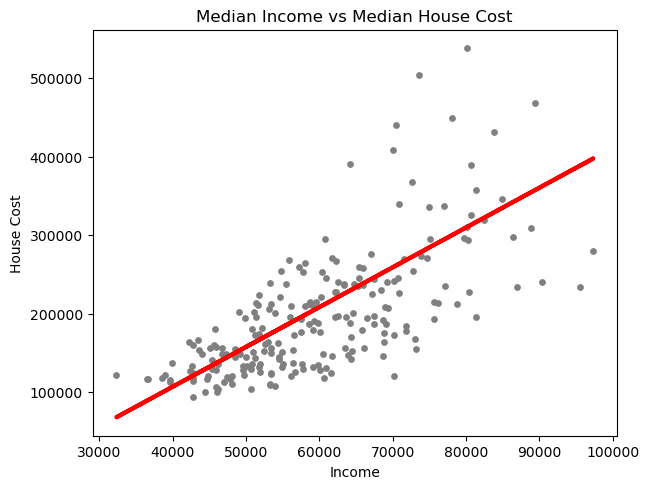

In [28]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Median Income vs Median House Cost')
plt.tight_layout()  
plot_test.xlabel('Income')
plot_test.ylabel('House Cost')
plot_test.show()

In [29]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [30]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[5.0709981]]
Mean squared error:  3477548758.8933387
R2 score:  0.44489105518378647


In [31]:
y_predicted

array([[120864.04045828],
       [311837.82900658],
       [255296.20016129],
       [120864.04045828],
       [207628.81799576],
       [204129.82930488],
       [245762.72372819],
       [105245.36630191],
       [174210.94049886],
       [165742.37366732],
       [142466.49237585],
       [219697.79348022],
       [136786.97450081],
       [189981.74459831],
       [362294.26012861],
       [146726.13078213],
       [132730.17601864],
       [274515.28297059],
       [316858.11712827],
       [259860.09845374],
       [127405.62801078],
       [180600.39810828],
       [138358.98391265],
       [235823.56744686],
       [268125.82536117],
       [316503.14726108],
       [252912.83105302],
       [135316.38505102],
       [252405.73124275],
       [181513.17776677],
       [189728.19469317],
       [241401.66535985],
       [245712.01374716],
       [174920.88023324],
       [164576.0441037 ],
       [254332.71052178],
       [104687.55651061],
       [196827.59203697],
       [2086

In [32]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,159476.125000,120864.040458
1,227903.486100,311837.829007
2,239710.516660,255296.200161
3,93985.166670,120864.040458
4,135138.533665,207628.817996
5,132178.340275,204129.829305
6,187044.233410,245762.723728
7,113160.494321,105245.366302
8,108986.461809,174210.940499
9,211375.000000,165742.373667


In [33]:
# Predicting the X_train
y_predicted_train = regression.predict(X_train) 

In [34]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [35]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[5.0709981]]
Mean squared error:  4539450619.266928
R2 score:  0.47485984165089734


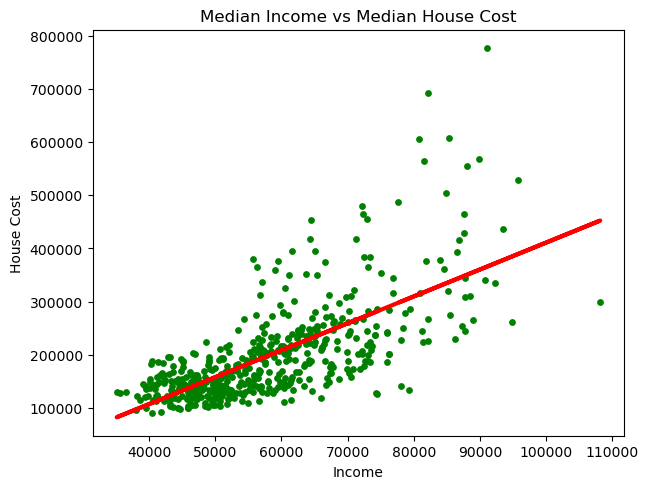

In [36]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Median Income vs Median House Cost')
plt.tight_layout()  
plot_test.xlabel('Income')
plot_test.ylabel('House Cost')
plot_test.show()

## Performance Improvement After Removing Outliers

In [37]:
# Clean the extreme values from income
df_test = df[df['Income'] >=35000]

In [38]:
# Clean the extreme values from house cost
df_test = df[df['House Cost'] >=80000]

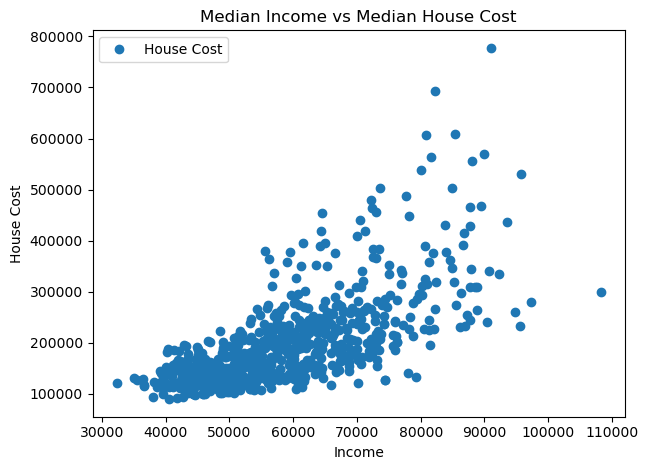

In [39]:
# See how the scatterplot looks without outliers.
df_test.plot(x = 'Income', y='House Cost', style='o')  
plot_test.title('Median Income vs Median House Cost')
plt.tight_layout()  
plot_test.xlabel('Income')
plot_test.ylabel('House Cost')  
plt.show()

In [40]:
# Reshape again
X_2 = df_test['Income'].values.reshape(-1,1)
y_2 = df_test['House Cost'].values.reshape(-1,1)

In [41]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [42]:
# Run and fit the regression.
regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [43]:
# Predict
y_predicted_2 = regression.predict(X_test_2)

In [44]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [45]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[5.0709981]]
Mean squared error:  3477548758.8933387
R2 score:  0.44489105518378647


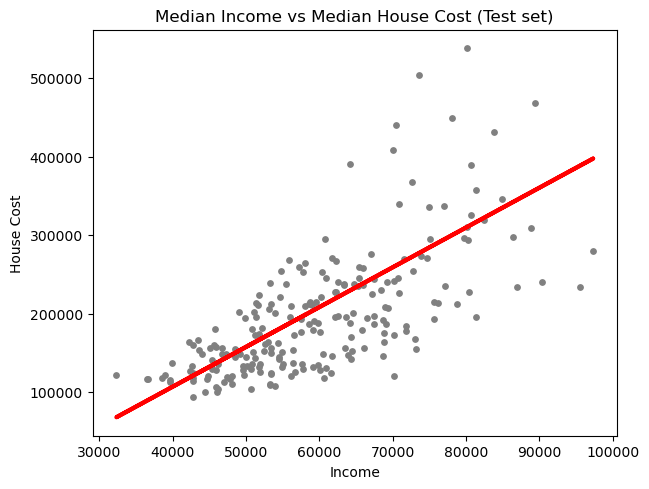

In [46]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Median Income vs Median House Cost (Test set)')
plt.tight_layout()  
plot_test.xlabel('Income')
plot_test.ylabel('House Cost')
plot_test.show()

In [47]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,159476.125000,120864.040458
1,227903.486100,311837.829007
2,239710.516660,255296.200161
3,93985.166670,120864.040458
4,135138.533665,207628.817996
5,132178.340275,204129.829305
6,187044.233410,245762.723728
7,113160.494321,105245.366302
8,108986.461809,174210.940499
9,211375.000000,165742.373667


### Hypothesis:

The average cost of houses in the US has increased at a greater rate than the average household income from 2008-2022.

### Interpretation of how the line fits the data 

This particular type of line regression does not give a full picture of the data. Though the line fits and shows a pattern, it doesn't show a lot to the audience visually.

### Compare the y values

Note: This dataset is not large enough for a line regression model to make proper predictions. 

The predicted numbers aren't far off the actual numbers. The training was done well.

### Reflections

This dataset is far too small for a proper analysis. This model will come in handy in the future for larger models.